In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os, glob, shutil
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import time
from yellowbrick.cluster import KElbowVisualizer
import os

In [4]:
df = pd.read_pickle("fe_goya_ResNet18.pkl")

In [5]:
df.head()

,IMAGE_0,IMAGE_1,IMAGE_2,IMAGE_3,IMAGE_4,IMAGE_5,IMAGE_6,IMAGE_7,IMAGE_8,IMAGE_9,...,IMAGE_503,IMAGE_504,IMAGE_505,IMAGE_506,IMAGE_507,IMAGE_508,IMAGE_509,IMAGE_510,IMAGE_511,Ref_ID
0,0.685824,0.208413,0.509166,1.225408,0.682468,0.213011,1.161891,0.413355,1.450979,1.228784,...,1.009769,0.126726,1.608693,0.281365,1.283802,0.351807,2.235985,0.300751,0.367307,0_the-esquilache-riots.jpg!Large.jpg
1,0.682056,0.402399,0.189067,1.701517,0.651930,0.490172,0.951713,0.655363,1.603630,0.660326,...,0.342630,0.155226,3.236277,0.870965,0.138728,0.727058,1.991044,0.090474,0.484554,100_they-sing-for-the-composer.jpg!Large.jpg
2,0.401340,0.604747,0.421622,1.708850,0.499421,0.153852,0.611808,0.896158,1.754621,0.851673,...,0.395280,0.062506,1.961404,1.046404,0.145650,0.627814,2.761256,0.180120,0.256053,101_woman-battered-with-a-cane.jpg!Large.jpg
3,0.395163,0.514536,0.124978,0.505941,0.603862,1.177288,0.348098,0.527872,0.791183,0.854109,...,0.347406,0.565091,0.622894,0.467186,0.075907,0.687044,1.572968,0.565127,0.264530,102_mariana-waldstein-ninth-marquesa-de-santa-...
4,0.695667,0.265572,0.130481,1.060318,0.219024,0.359730,0.600694,1.758153,0.861342,1.052022,...,0.574269,0.307973,0.528910,0.341130,0.523742,0.388666,1.550181,0.281881,0.241523,103_incantation.jpg!Large.jpg


In [6]:
df_id=df[['Ref_ID']]

In [9]:
del df['Ref_ID']

## PCA

In [21]:
pca = PCA(n_components = min(df.shape[0], df.shape[1])-1)


Shape x_PCA:  (406, 405)
Explained Variance: 0 components: 0
Explained Variance: 5 components: 0.4521409347653389
Explained Variance: 10 components: 0.5734664872288704
Explained Variance: 15 components: 0.6471907589584589
Explained Variance: 20 components: 0.6987376287579536
Explained Variance: 25 components: 0.7378220576792955
Explained Variance: 30 components: 0.7676598401740193
Explained Variance: 35 components: 0.7926113987341523
Explained Variance: 40 components: 0.8129829613026232
Explained Variance: 45 components: 0.8303392296656966
Explained Variance: 50 components: 0.8456428570207208
Explained Variance: 55 components: 0.8590086225885898
Explained Variance: 60 components: 0.8709524113219231
Explained Variance: 65 components: 0.8816316607408226
Explained Variance: 70 components: 0.8912248932756484
Explained Variance: 75 components: 0.8999316337285563
Explained Variance: 80 components: 0.9077115586260334
Explained Variance: 85 components: 0.9148302241228521
Explained Variance: 90

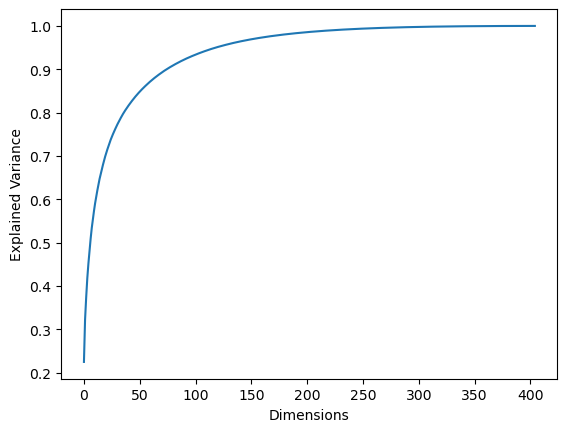

In [22]:

pca.fit(df)
pca_result = pca.transform(df)

print("Shape x_PCA: ", pca_result.shape)
expl = pca.explained_variance_ratio_

for x in range(0, len(df.columns), 5):
    print("Explained Variance: " + str(x) + " components:", sum(expl[0:x]))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.show()



In [24]:
pca_120 = PCA(n_components=120)
pca_result = pca_120.fit_transform(df)
print('Cumulative explained variation for 120 principal components: {}'.format(np.sum(pca_120.explained_variance_ratio_)))

Cumulative explained variation for 120 principal components: 0.9504582285881042


In [25]:
principalDf = pd.DataFrame(data = pca_result)

In [26]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.416877,3.912696,-0.001985,-2.548702,2.228808,0.418128,-1.615701,0.169785,-0.933013,0.844500,...,0.067211,0.147212,-0.282420,0.323032,-0.244858,0.010818,-0.179151,-0.140891,0.213726,0.284754
1,4.984756,-1.612713,-0.658919,-0.366518,-0.486989,1.656751,-1.212367,0.002548,-0.018363,-0.336967,...,0.526920,-0.106199,-0.014941,0.391870,0.087873,-0.157321,-0.196746,-0.088073,-0.038890,-0.004058
2,2.216666,-2.489018,0.423800,1.103347,0.851818,1.062236,0.467399,-1.047176,0.266227,-0.010289,...,0.004992,0.035901,0.124992,-0.103342,0.298699,-0.244337,-0.059799,-0.004614,-0.306122,0.034241
3,-2.698667,0.058427,0.025877,1.215303,0.120496,0.214469,2.140331,0.109562,-1.946343,0.527532,...,0.373427,-0.222165,0.288505,-0.136774,-0.222269,-0.014610,-0.178858,-0.363234,0.178290,-0.113480
4,-1.294241,0.552051,-1.698074,-0.584387,0.870785,-1.835723,0.521768,3.082344,1.037475,-0.645709,...,0.238262,0.178138,0.100225,-0.101935,0.189286,-0.145834,-0.331014,0.049089,0.126382,-0.038228


In [27]:
finalDf = pd.concat([principalDf, df_id], axis = 1)
finalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,Ref_ID
0,0.416877,3.912696,-0.001985,-2.548702,2.228808,0.418128,-1.615701,0.169785,-0.933013,0.844500,...,0.147212,-0.282420,0.323032,-0.244858,0.010818,-0.179151,-0.140891,0.213726,0.284754,0_the-esquilache-riots.jpg!Large.jpg
1,4.984756,-1.612713,-0.658919,-0.366518,-0.486989,1.656751,-1.212367,0.002548,-0.018363,-0.336967,...,-0.106199,-0.014941,0.391870,0.087873,-0.157321,-0.196746,-0.088073,-0.038890,-0.004058,100_they-sing-for-the-composer.jpg!Large.jpg
2,2.216666,-2.489018,0.423800,1.103347,0.851818,1.062236,0.467399,-1.047176,0.266227,-0.010289,...,0.035901,0.124992,-0.103342,0.298699,-0.244337,-0.059799,-0.004614,-0.306122,0.034241,101_woman-battered-with-a-cane.jpg!Large.jpg
3,-2.698667,0.058427,0.025877,1.215303,0.120496,0.214469,2.140331,0.109562,-1.946343,0.527532,...,-0.222165,0.288505,-0.136774,-0.222269,-0.014610,-0.178858,-0.363234,0.178290,-0.113480,102_mariana-waldstein-ninth-marquesa-de-santa-...
4,-1.294241,0.552051,-1.698074,-0.584387,0.870785,-1.835723,0.521768,3.082344,1.037475,-0.645709,...,0.178138,0.100225,-0.101935,0.189286,-0.145834,-0.331014,0.049089,0.126382,-0.038228,103_incantation.jpg!Large.jpg


In [28]:
finalDf.set_index('Ref_ID', inplace=True)

In [29]:
finalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
Ref_ID,,,,,,,,,,,,,,,,,,,,,
0_the-esquilache-riots.jpg!Large.jpg,0.416877,3.912696,-0.001985,-2.548702,2.228808,0.418128,-1.615701,0.169785,-0.933013,0.844500,...,0.067211,0.147212,-0.282420,0.323032,-0.244858,0.010818,-0.179151,-0.140891,0.213726,0.284754
100_they-sing-for-the-composer.jpg!Large.jpg,4.984756,-1.612713,-0.658919,-0.366518,-0.486989,1.656751,-1.212367,0.002548,-0.018363,-0.336967,...,0.526920,-0.106199,-0.014941,0.391870,0.087873,-0.157321,-0.196746,-0.088073,-0.038890,-0.004058
101_woman-battered-with-a-cane.jpg!Large.jpg,2.216666,-2.489018,0.423800,1.103347,0.851818,1.062236,0.467399,-1.047176,0.266227,-0.010289,...,0.004992,0.035901,0.124992,-0.103342,0.298699,-0.244337,-0.059799,-0.004614,-0.306122,0.034241
102_mariana-waldstein-ninth-marquesa-de-santa-cruz.jpg!Large.jpg,-2.698667,0.058427,0.025877,1.215303,0.120496,0.214469,2.140331,0.109562,-1.946343,0.527532,...,0.373427,-0.222165,0.288505,-0.136774,-0.222269,-0.014610,-0.178858,-0.363234,0.178290,-0.113480
103_incantation.jpg!Large.jpg,-1.294241,0.552051,-1.698074,-0.584387,0.870785,-1.835723,0.521768,3.082344,1.037475,-0.645709,...,0.238262,0.178138,0.100225,-0.101935,0.189286,-0.145834,-0.331014,0.049089,0.126382,-0.038228


### KMeans PCA


In [31]:
sil = []
kl = []
kmax = 50

for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(finalDf)
    labels = kmeans2.labels_
    sil.append(silhouette_score(finalDf, labels, metric = 'euclidean'))
    kl.append(k)

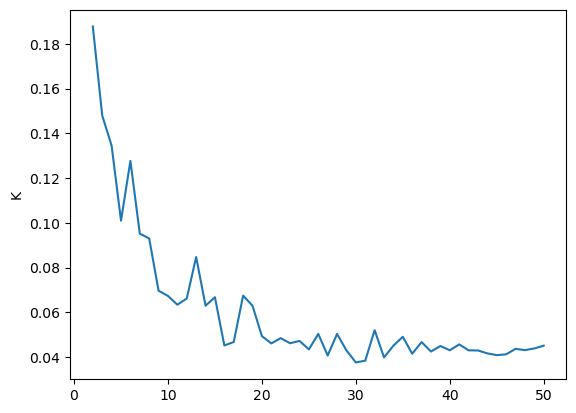

In [32]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()

## TSNE

In [349]:
time_start = time.time()
tsne = TSNE(n_components=2,verbose=1,early_exaggeration=800)#, perplexity=30)#, learning_rate=10, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 406 samples in 0.060s...
[t-SNE] Computed neighbors for 406 samples in 0.625s...
[t-SNE] Computed conditional probabilities for sample 406 / 406
[t-SNE] Mean sigma: 4.059999
[t-SNE] KL divergence after 250 iterations with early exaggeration: 8390.037109
[t-SNE] KL divergence after 1000 iterations: 0.168567
t-SNE done! Time elapsed: 7.021137237548828 seconds


In [350]:
df['tsne-3d-one'] = tsne_results[:,0]
df['tsne-3d-two'] = tsne_results[:,1]

In [351]:
#tsne_df_scale = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2','tsne3'])
tsne_df_scale = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

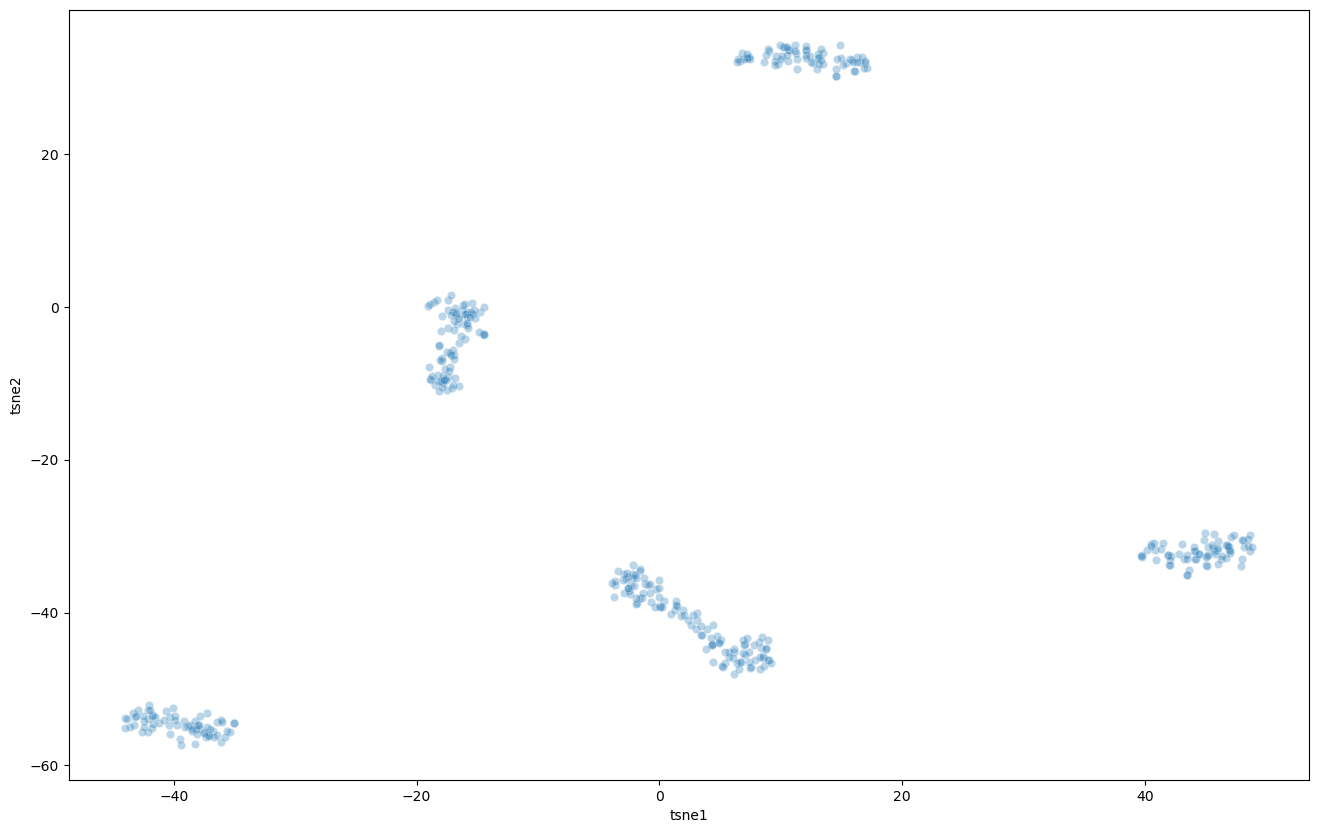

In [352]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    palette=sns.color_palette("hls", 10),
    data=tsne_df_scale,
    legend="full",
    alpha=0.3
)

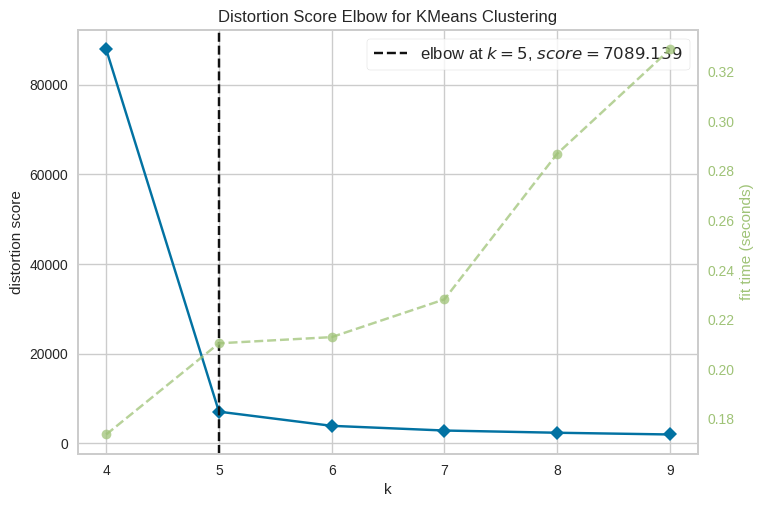

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [355]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,10))

visualizer.fit(tsne_df_scale)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [356]:
kmeans = KMeans(5)
kmeans.fit(tsne_df_scale)

KMeans(n_clusters=5)

In [357]:
identified_clusters = kmeans.fit_predict(tsne_df_scale)

In [358]:
data_with_clusters = pd.DataFrame(identified_clusters)

In [386]:
data_with_clusters.value_counts()

1    114
4     81
0     71
2     71
3     69
dtype: int64

In [387]:
df.reset_index(level=0, inplace=True)

In [388]:
iddf=df_id['Ref_ID']

In [389]:
finalDf_tsne = pd.concat([iddf, tsne_df_scale], axis=1)

In [390]:
df_final    = pd.concat([finalDf_tsne, data_with_clusters], axis=1)

In [391]:
df_final=df_final.rename(columns={0: "Cluster"})

In [392]:
df_final.head()

,Ref_ID,tsne1,tsne2,Cluster
0,0_the-esquilache-riots.jpg!Large.jpg,8.333446,-44.674519,1
1,100_they-sing-for-the-composer.jpg!Large.jpg,-17.919098,-1.251708,4
2,101_woman-battered-with-a-cane.jpg!Large.jpg,48.121220,-31.482098,2
3,102_mariana-waldstein-ninth-marquesa-de-santa-...,-2.181302,-34.985844,1
4,103_incantation.jpg!Large.jpg,12.096787,33.550594,0


In [367]:
df_final=df_final.set_index('Ref_ID')

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

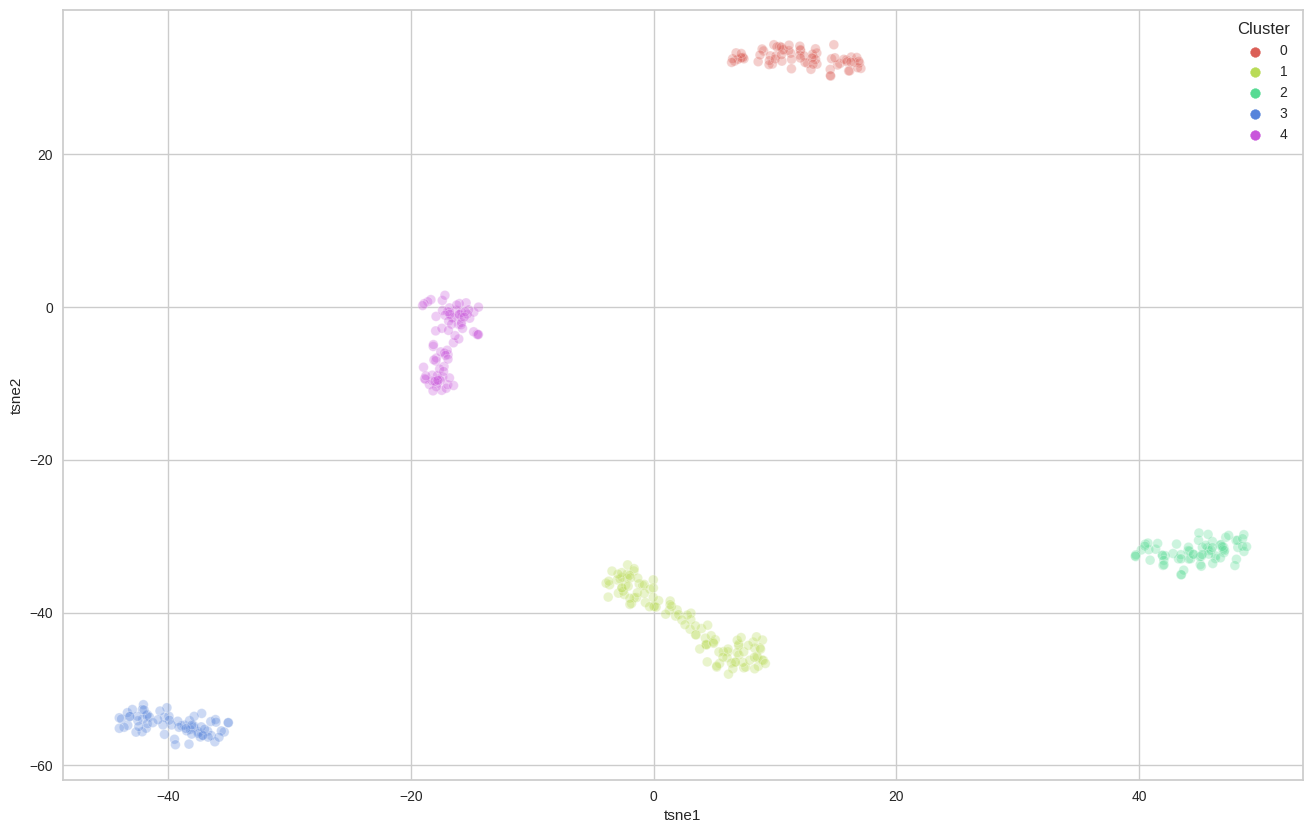

In [368]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    palette=sns.color_palette("hls", 5),
    data=df_final,
    hue='Cluster',
    legend="full",
    alpha=0.3
)

In [369]:
df_final.to_pickle("df_tsne_cluster_goya.pkl")

In [371]:
path = "/home/steiner/Escritorio/Python/pinturas/"
files = os.listdir(path)
jpg_files = [file for file in files if file.endswith(".jpg")]

In [372]:
sorted_list = sorted(jpg_files)
# Crear el DataFrame
ndf = pd.DataFrame({'file_name': sorted_list})
# Ver las primeras filas
print(ndf.head())

                                           file_name
0               0_the-esquilache-riots.jpg!Large.jpg
1       100_they-sing-for-the-composer.jpg!Large.jpg
2       101_woman-battered-with-a-cane.jpg!Large.jpg
3  102_mariana-waldstein-ninth-marquesa-de-santa-...
4                      103_incantation.jpg!Large.jpg


In [378]:
end= pd.concat([df_final,ndf],axis=1)

In [379]:
end

,tsne1,tsne2,Cluster,file_name
0_the-esquilache-riots.jpg!Large.jpg,8.333446,-44.674519,1.0,NaN
100_they-sing-for-the-composer.jpg!Large.jpg,-17.919098,-1.251708,4.0,NaN
101_woman-battered-with-a-cane.jpg!Large.jpg,48.121220,-31.482098,2.0,NaN
102_mariana-waldstein-ninth-marquesa-de-santa-cruz.jpg!Large.jpg,-2.181302,-34.985844,1.0,NaN
103_incantation.jpg!Large.jpg,12.096787,33.550594,0.0,NaN
...,...,...,...,...
401,NaN,NaN,NaN,96_martín-zapater-1797.jpg!Large.jpg
402,NaN,NaN,NaN,97_naked-girl-looking-in-the-mirror.jpg!Large.jpg
403,NaN,NaN,NaN,98_st-gregory-the-great-1797.jpg!Large.jpg
404,NaN,NaN,NaN,99_the-duchess-of-alba-1797.jpg!Large.jpg
